# Test Development Notebook

### Imports

In [1]:
import pandas as pd

import lcanalyzer.models as models
import pandas.testing as pdt
import numpy as np

### Params

In [2]:
bands = "ugrizy"

### Load the data

In [3]:
lc_datasets = {}
lc_datasets["lsst"] = pd.read_pickle("data/lsst_RRLyr.pkl")
lc_datasets["kepler"] = pd.read_csv("data/kepler_RRLyr.csv")

### Inspect the data

In [4]:
lc_datasets["lsst"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11177 entries, 0 to 11176
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   band         11177 non-null  object 
 1   ccdVisitId   11177 non-null  int64  
 2   coord_ra     11177 non-null  float64
 3   coord_dec    11177 non-null  float64
 4   objectId     11177 non-null  int64  
 5   psfFlux      11177 non-null  float64
 6   psfFluxErr   11177 non-null  float64
 7   psfMag       10944 non-null  float64
 8   ccdVisitId2  11177 non-null  int64  
 9   band2        11177 non-null  object 
 10  expMidptMJD  11177 non-null  float64
 11  zeroPoint    11177 non-null  float32
dtypes: float32(1), float64(6), int64(3), object(2)
memory usage: 1004.3+ KB


In [5]:
lc_datasets["kepler"].head()

,time,flux,flux_err,quality,timecorr,centroid_col,centroid_row,cadenceno,sap_flux,sap_flux_err,...,psf_centr1,psf_centr1_err,psf_centr2,psf_centr2_err,mom_centr1,mom_centr1_err,mom_centr2,mom_centr2_err,pos_corr1,pos_corr2
0,131.512404,10180609.0,78.926155,128,0.001410,653.372470,51.053028,1105,10129629.0,79.186980,...,NaN,NaN,NaN,NaN,653.372470,0.000006,51.053028,0.000063,0.011782,-0.010195
1,131.532839,10013518.0,78.233770,128,0.001411,653.372292,51.053872,1106,9949931.0,78.459984,...,NaN,NaN,NaN,NaN,653.372292,0.000006,51.053872,0.000062,0.011726,-0.010246
2,131.553273,9852474.0,77.673160,128,0.001412,653.372167,51.044559,1107,9783633.0,77.827200,...,NaN,NaN,NaN,NaN,653.372167,0.000006,51.044559,0.000062,0.011575,-0.010089
3,131.573707,9722936.0,77.109710,128,0.001413,653.371408,51.045081,1108,9651452.0,77.313590,...,NaN,NaN,NaN,NaN,653.371408,0.000006,51.045081,0.000062,0.011366,-0.009939
4,131.594142,9717073.0,77.103550,0,0.001414,653.372167,51.052828,1109,9646289.0,77.262634,...,NaN,NaN,NaN,NaN,653.372167,0.000006,51.052828,0.000062,0.011526,-0.010702


In [6]:
len(lc_datasets["lsst"]["objectId"].unique())

25

### Select a single light curve

In [4]:
# Pick an object
obj_id = lc_datasets["lsst"]["objectId"].unique()[7]

In [5]:
### Get all the observations for this obj_id for each band
# Create an empty dict
lc = {}
# Define the bands names
bands = "ugrizy"
# For each band create a bool array that indicates
# that this observation belongs to a certain object and is made in a
# certain band
for b in bands:
    filt_band_obj = (lc_datasets["lsst"]["objectId"] == obj_id) & (
        lc_datasets["lsst"]["band"] == b
    )
    # Select the observations and store in the dict 'lc'
    lc[b] = lc_datasets["lsst"][filt_band_obj]

In [6]:
models.max_mag(lc["g"], "psfMag")

18.424448712422393

In [102]:
# max_tab_by_groupby = lc_datasets["lsst"].groupby(["objectId", "band"])["psfMag"].max()
# max_tab_by_groupby.reset_index()

## Developing new function for getting statistics for all bands

In [7]:
mag_col = "psfMag"

In [8]:
def calc_stat(lc, bands, mag_col):
    stat = {}
    for b in bands:
        stat[b + "_max"] = models.max_mag(lc[b], mag_col)
    return stat

In [9]:
calc_stat(lc, bands, mag_col)

{'u_max': 20.516129354150713,
 'g_max': 18.424448712422393,
 'r_max': 18.32032368182854,
 'i_max': 18.37879400453592,
 'z_max': 18.418037351622612,
 'y_max': 18.462675198599573}

## Experimenting with testing

In [208]:
test_input = pd.DataFrame(data=[[1, 5, 3], [7, 8, 9], [3, 4, 1]], columns=list("abc"))
test_output = 7

In [207]:
assert models.max_mag(test_input, "a") == test_output

AssertionError: 

In [221]:
test_input = pd.DataFrame(
    data=[[-7, -7, -3], [-4, -3, -1], [-1, -5, -3]], columns=list("abc")
)

In [222]:
test_input

,a,b,c
0,-7,-7,-3
1,-4,-3,-1
2,-1,-5,-3


In [226]:
models.min_mag(test_input, "b")

-7

In [199]:
df1 = pd.DataFrame(data=[[1, 5, 3], [7, 8, 9], [3, 4, 1]], columns=list("abc"))
df2 = pd.DataFrame(data=[[7, 3, 2], [8, 4, 2], [5, 6, 4]], columns=list("abc"))
df3 = pd.DataFrame(data=[[2, 6, 3], [1, 3, 6], [8, 9, 1]], columns=list("abc"))
test_input = {"df1": df1, "df2": df2, "df3": df3}

In [200]:
calc_stat(test_input, ["df1", "df2", "df3"], "b")

{'df1_max': 8, 'df2_max': 6, 'df3_max': 9}

In [201]:
test_output = {"df1_max": 8, "df12_max": 6, "df3_max": 8}

In [202]:
test_output == calc_stat(test_input, ["df1", "df2", "df3"], "b")

False

In [189]:
lc.keys()

dict_keys(['u', 'g', 'r', 'i', 'z', 'y'])

In [184]:
import unittest

In [186]:
unittest.TestCase.assertDictEqual(
    calc_stat(test_input, ["df1", "df2", "df3"], "b"), test_output
)

TypeError: TestCase.assertDictEqual() missing 1 required positional argument: 'd2'

In [163]:
import numpy as np

In [164]:
df1 = pd.DataFrame(data=[[1, 5, 3], [7, np.NaN, 9], [3, 4, 1]], columns=list("abc"))
df2 = pd.DataFrame(data=[[7, 3, 2], [8, 4, 2], [5, 6, 4]], columns=list("abc"))
df3 = pd.DataFrame(data=[[2, 6, 3], [1, 3, 6], [8, 9, 1]], columns=list("abc"))
test_input = {"df1": df1, "df2": df2, "df3": df3}

In [165]:
calc_stat(test_input, ["df1", "df2", "df3"], "b")

{'df1_max': 5.0, 'df2_max': 6, 'df3_max': 9}

In [167]:
df1

,a,b,c
0,1,5.0,3
1,7,NaN,9
2,3,4.0,1


In [227]:
np.random.randint(1, 5, (3, 3))

array([[2, 2, 2],
       [2, 2, 2],
       [2, 4, 4]])

In [228]:
np.random.rand(4, 5)

array([[0.74388382, 0.63958656, 0.91144613, 0.68235806, 0.62163621],
       [0.58642309, 0.48093582, 0.48578257, 0.97574531, 0.30148308],
       [0.86746741, 0.77709938, 0.28548563, 0.77155226, 0.35750828],
       [0.94201326, 0.90645773, 0.29164586, 0.14766958, 0.35175889]])

In [231]:
test_df = pd.DataFrame(data=[[1, 5, 3], [7, 8, 9], [3, 4, 1]], columns=list("abc"))

In [247]:
models.mean_mag(test_df, "a")

3.6666666666666665

In [233]:
import pytest

In [250]:
assert models.mean_mag(test_df, "a") == pytest.approx(3.66, 0.01)

AssertionError: 

## Lomb-Scrgle periodogram

In [39]:
b = "g"

In [56]:
import astropy.units as u
import numpy as np
from astropy.timeseries import LombScargle

In [41]:
col_time = "expMidptMJD"
col_mag = "psfMag"
col_band = "band"

In [42]:
min_period = 0.2 * u.day
max_period = 1 * u.day

min_freq_search = 1.0 / max_period
max_freq_search = 1.0 / min_period

In [43]:
freq, power = LombScargle(
    np.array(lc[b][col_time]) * u.day, np.array(lc[b][col_mag])
).autopower(minimum_frequency=min_freq_search, maximum_frequency=max_freq_search)

In [44]:
import matplotlib.pyplot as plt

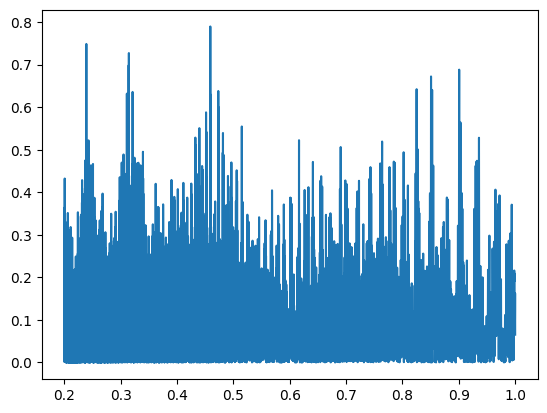

In [46]:
plt.plot(1 / freq, power)

## Debugging

In [28]:
def calc_stats(lc, bands, mag_col):
    stats = {}
    for b in bands:
        stat = {}
        stat["max"] = models.max_mag(lc[b], mag_col)
        stat["mean"] = models.max_mag(lc[b], mag_col)
        stat["min"] = models.mean_mag(lc[b], mag_col)
#        stat["mean"] = models.mean_mag(lc[b], mag_col)
#        stat["min"] = models.min_mag(lc[b], mag_col)
        stats[b] = stat
    return pd.DataFrame.from_records(stats)

In [29]:
calc_stats(lc, bands, mag_col)

,g,i,r,u,y,z
max,18.424449,18.378794,18.320324,20.516129,18.462675,18.418037
mean,18.424449,18.378794,18.320324,20.516129,18.462675,18.418037
min,18.031803,18.045039,17.976085,20.003691,18.172849,18.089484


In [30]:
test_cols = list("abc")

In [14]:
size = (4, 3)
np.random.randint(0, 10, size)

array([[8, 1, 6],
       [2, 4, 6],
       [6, 6, 4],
       [9, 2, 8]])

In [31]:
test_dict = {}
test_dict["df0"] = pd.DataFrame(
    data=[[8, 8, 0], 
          [0, 1, 1], 
          [2, 3, 1], 
          [7, 9, 7]], columns=test_cols
)
test_dict["df1"] = pd.DataFrame(
    data=[[3, 8, 2], 
          [3, 8, 0], 
          [3, 9, 8], 
          [8, 2, 5]], columns=test_cols
)
test_dict["df2"] = pd.DataFrame(
    data=[[8, 4, 3], 
          [7, 6, 3], 
          [4, 2, 9], 
          [6, 4, 0]], columns=test_cols
)

In [36]:
test_output = pd.DataFrame(data=[[9,9,6],[5.25,6.75,4.],[1,2,2]],columns=['df0','df1','df2'],index=['max','mean','min'])

In [38]:
test_output

,df0,df1,df2
max,9.00,9.00,6.0
mean,5.25,6.75,4.0
min,1.00,2.00,2.0


In [34]:
assert calc_stats(test_dict, test_dict.keys(), 'b') == test_output

ValueError: Can only compare identically-labeled (both index and columns) DataFrame objects

In [37]:
pdt.assert_frame_equal(calc_stats(test_dict, test_dict.keys(), 'b'),
                              test_output,
                             check_exact=False,
                             atol=0.01)

AssertionError: DataFrame.iloc[:, 0] (column name="df0") are different

DataFrame.iloc[:, 0] (column name="df0") values are different (66.66667 %)
[index]: [max, mean, min]
[left]:  [9.0, 9.0, 5.25]
[right]: [9.0, 5.25, 1.0]
At positional index 1, first diff: 9.0 != 5.25

## Edge cases for testing

In [12]:
def normalize_lc(df,mag_col):
    # Normalize a light curve
    #if any(df[mag_col].abs() > 90):
    #    raise ValueError(mag_col+' contains values with abs() larger than 90!')
    min = models.min_mag(df,mag_col)
    max = models.max_mag((df-min),mag_col)
    lc = (df[mag_col]-min)/max
    return lc

In [13]:
test_cols = list('abc')

In [60]:
test_df = pd.DataFrame(
    data=[[8, 9, 1], 
          [1, 4, 1], 
          [1, 2, 4], 
          [1, 4, 1]], columns=test_cols
)

In [61]:
normalize_lc(test_df,'b')

0    1.000000
1    0.285714
2    0.000000
3    0.285714
Name: b, dtype: float64

In [62]:
test_output=pd.Series(data=[1,0.285,0,0.285])

In [63]:
pdt.assert_series_equal(normalize_lc(test_df,'b'),test_output,check_exact=False,atol=0.01,check_names=False)

In [64]:
test_df = pd.DataFrame(
    data=[[0, 0, 0], 
          [0, 0, 0], 
          [0, 0, 0], 
          [0, 0, 0]], columns=test_cols
)

In [70]:
test_output=pd.Series(data=[np.NaN,np.NaN,np.NaN,np.NaN])

In [71]:
normalize_lc(test_df,'b')

0   NaN
1   NaN
2   NaN
3   NaN
Name: b, dtype: float64

In [72]:
pdt.assert_series_equal(normalize_lc(test_df,'b'),test_output,check_exact=False,atol=0.01,check_names=False)

In [18]:
import lcanalyzer.models_full as models_full

In [22]:
test_df = pd.DataFrame(
    data=[[8, 9, 1], 
          [1, -99.9, 1], 
          [1, 2, 4], 
          [1, 4, 1]], columns=test_cols
)

In [23]:
test_output=pd.Series(data=[1,0.285,0,0.285])

In [24]:
models_full.normalize_lc(test_df,'b')

ValueError: b contains values with abs() larger than 90!

In [25]:
pdt.assert_series_equal(normalize_lc(test_df,'b'),test_output,check_exact=False,atol=0.01,check_names=False)

AssertionError: Series are different

Series values are different (75.0 %)
[index]: [0, 1, 2, 3]
[left]:  [1.0, 0.0, 0.9357208448117539, 0.9540863177226814]
[right]: [1.0, 0.285, 0.0, 0.285]
At positional index 1, first diff: 0.0 != 0.285

In [14]:
test_df = pd.DataFrame(
    data=[[2, 2, 2], 
          [2, 2, 2], 
          [2, 2, 2], 
          [2, 2, 2]], columns=test_cols
)

In [15]:
test_output=pd.Series(data=[np.NaN,np.NaN,np.NaN,np.NaN])

In [19]:
models_full.normalize_lc(test_df,'b')

0    0.0
1    0.0
2    0.0
3    0.0
Name: b, dtype: float64

In [81]:
pdt.assert_series_equal(normalize_lc(test_df,'b'),test_output,check_exact=False,atol=0.01,check_names=False)

In [26]:
isinstance(test_df,pd.DataFrame)

True